# Multiclass classification with the Fashion-MNIST dataset using Keras
A classification of 60,000 28*28 pixel grayscale images of fashion articles from 10 categories provided by the Keras library.

## Import libraries

In [1]:
from keras.datasets import fashion_mnist

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

Using TensorFlow backend.


## Data preparation
Loading data, defining labels, visualize and preprocess data.

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


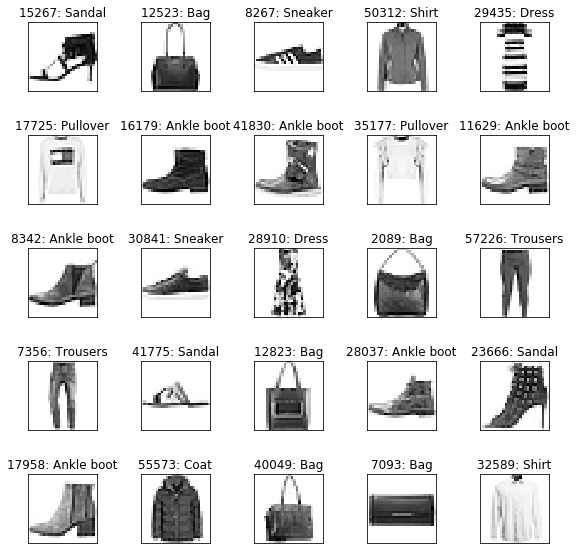

In [2]:
# Load Fashion-MNIST data through Keras library
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define labels
labels = {0:'T-shirt/top',
          1:'Trousers',
          2:'Pullover',
          3:'Dress',
          4:'Coat',
          5:'Sandal',
          6:'Shirt',
          7:'Sneaker',
          8:'Bag',
          9:'Ankle boot'}

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

fig, axs = plt.subplots(5, 5, figsize=(8,8))
for i in np.arange(5):
    for j in np.arange(5):
        n = random.randint(0,60000)
        axs[i,j].imshow(X_train[n,], aspect='equal', cmap='Greys')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].set_title(str(n) + ': ' + labels[y_train[n]])
plt.tight_layout()
    
# Reshape and normalize image data
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])
X_train = X_train/255
X_test = X_test/255

# Make labels categorical
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

## Define and compile convolutional neural network (CNN) architecture
We use two convolutional layers, each being max-pooled, followed by a densely connected layer with a 50% dropout.

In [4]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3212288   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
__________

## Compile and train model

In [6]:
cnn.compile(keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(X_train, y_train, validation_split=0.10, batch_size=64, epochs=25, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
 - 150s - loss: 0.5292 - acc: 0.8086 - val_loss: 0.4025 - val_acc: 0.8530
Epoch 2/25
 - 156s - loss: 0.3864 - acc: 0.8618 - val_loss: 0.3499 - val_acc: 0.8740
Epoch 3/25
 - 176s - loss: 0.3395 - acc: 0.8781 - val_loss: 0.3265 - val_acc: 0.8785
Epoch 4/25
 - 205s - loss: 0.3108 - acc: 0.8880 - val_loss: 0.3041 - val_acc: 0.8865
Epoch 5/25
 - 223s - loss: 0.2865 - acc: 0.8979 - val_loss: 0.2985 - val_acc: 0.8895
Epoch 6/25
 - 175s - loss: 0.2661 - acc: 0.9035 - val_loss: 0.2848 - val_acc: 0.8958
Epoch 7/25
 - 177s - loss: 0.2524 - acc: 0.9087 - val_loss: 0.2596 - val_acc: 0.9063
Epoch 8/25
 - 180s - loss: 0.2357 - acc: 0.9147 - val_loss: 0.2597 - val_acc: 0.9027
Epoch 9/25
 - 182s - loss: 0.2245 - acc: 0.9177 - val_loss: 0.2459 - val_acc: 0.9097
Epoch 10/25
 - 184s - loss: 0.2131 - acc: 0.9219 - val_loss: 0.2411 - val_acc: 0.9097
Epoch 11/25
 - 185s - loss: 0.2019 - acc: 0.9250 - val_loss: 0.2435 - val_acc: 0.9092
Epoch 12/25
 -

## Evaluate model performance
We've tracked train and test accuracy over the 25 epochs. By visualizing the accuracy and loss as a function of the number of epochs, we can gain insights about the  model's ability to adapt to an unknown dataset. 

Validation loss: 0.2497993569865823 
Validation accuracy: 0.9183


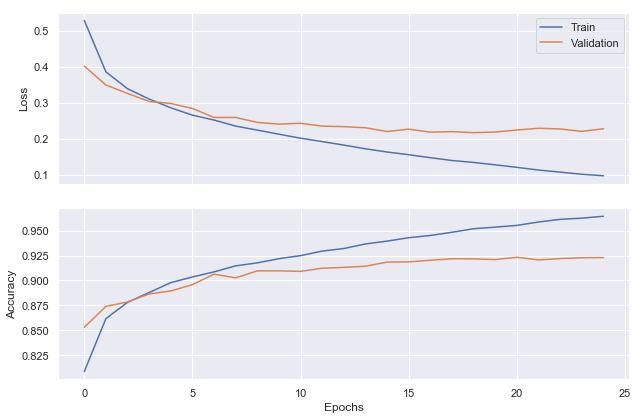

In [7]:
# Evaluate performance score on the validation dataset
loss_score, acc_score = cnn.evaluate(X_test, y_test, verbose=0)
print('Validation loss:', loss_score, '\nValidation accuracy:', acc_score)

# Visualize loss and accuracy by epoch
sns.set()
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(9,6))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[1].plot(history.history['acc'])
axs[1].plot(history.history['val_acc'])
axs[1].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Validation'])
plt.tight_layout()

### Insights
- While the model keeps improving its performance on the training dataset with increasing number of epochs, the validation score seems pretty much saturated.
- In fact, after 5 to 10 epochs, train and validation scores diverge significantly, indicating that the model is already over-fitting or _memorizing_ the training data. This, however, doesn't improve the model's performance on an unknown dataset.

## Visualize the predictions
With the newly trained model, we can now have a look at its predictions.

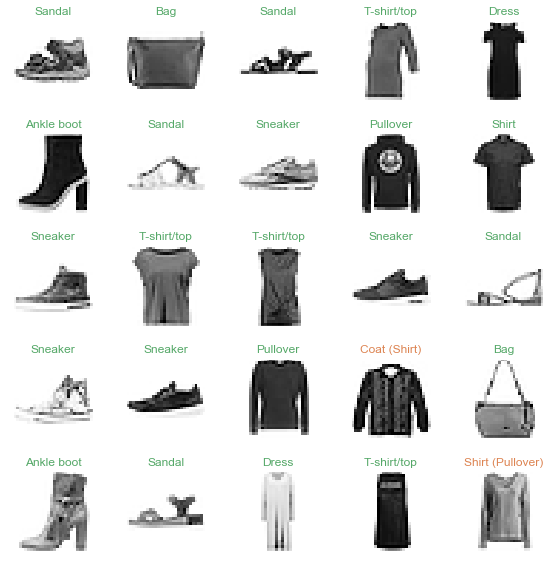

In [10]:
y_pred = np.argmax(cnn.predict(X_test), axis=1)

fig, axs = plt.subplots(5, 5, figsize=(8,8))
for i in np.arange(5):
    for j in np.arange(5):
        n = random.randint(0,10000)
        axs[i,j].imshow(X_test.reshape([10000, 28, 28])[n,], aspect='equal', cmap='Greys')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        if y_pred[n,] == np.argmax(y_test[n,]):
            axs[i,j].set_title(labels[y_pred[n,]], color='C2')
        else:
            axs[i,j].set_title(labels[y_pred[n,]] + ' (' + labels[np.argmax(y_test[n,])] + ')', color='C1')
plt.tight_layout()

fig.savefig('fashion_MNIST_preview.png')